In [2]:
import numpy as np

from env import YoutubeEnv
import matplotlib.pyplot as plt

In [3]:
seed = 420
env = YoutubeEnv.random_env(seed=seed)

In [4]:
env

In [5]:
u = env.users[0]
c = env.channels[0]
for v in c.videos:
    print("v = ", v)
    print(u.watch(v))

v =  <videos.Video object at 0x109b6f898>
sim :  0.32874180099820716
0.3769421065689068
v =  <videos.Video object at 0x161a959f60>
sim :  0.5630651601199522
0.5634249816640933
v =  <videos.Video object at 0x161a959f98>
sim :  0.40262483478458866
0.3140139906235941


In [9]:
actionsList = list(env.videos.values())

In [18]:
actionsList.index

<function list.index>

In [13]:
import random

random.sample(actionsList, 1)

In [14]:
q_table = np.zeros(len(actionsList))

In [21]:
[i for i in range(0, len(actionsList))]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [67]:
import random

def Qlearning(actions, user, time_horizon = 500):
    
    q_table = np.zeros(len(actions))

    # Hyperparameters
    alpha = 0.4
    gamma = 0.7
    epsilon = 0.4

    # For plotting metrics
    all_epochs = []
    all_penalties = []

    action_seq = []
    reward_seq = []

    for i in range(0, time_horizon):
        #state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        
        if random.uniform(0, 1) < epsilon:
            action = random.sample([i for i in range(0, len(actions))], 1)[0] # Explore action space
        else:
            action = np.argmax(q_table) # Exploit learned values
        print(action)
        reward = u.watch(actions[action]) 
        
        old_value = q_table[action]
        next_max = np.max(q_table)
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[action] = new_value
        
        action_seq.append(action)
        reward_seq.append(reward)

        if reward == 0:
            penalties += 1

        epochs += 1

    print("Training finished.\n")

    return action_seq, reward_seq



In [69]:
Qlearning(actionsList, u, time_horizon = 300)

0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
21
sim :  0.32874180099820716
0
sim :  0.32874180099820716
25
sim :  0.30242149965459286
28
sim :  0.30242149965459286
10
sim :  0.32874180099820716
0
sim :  0.32874180099820716
4
sim :  0.28469875095029595
0
sim :  0.32874180099820716
12
sim :  0.3492062684686189
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
4
sim :  0.28469875095029595
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
0
sim :  0.32874180099820716
13
sim :  0.5871202506048888
1
sim :  0.5630651601199522
0
sim :  0.32874180099820716
28
sim :  0.30242149965459286
17
sim :  1e-07
0
sim :  0.32874180099820716
6
sim :  0.349206268468

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  21,
  0,
  25,
  28,
  10,
  0,
  4,
  0,
  12,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  13,
  1,
  0,
  28,
  17,
  0,
  6,
  24,
  0,
  4,
  0,
  0,
  0,
  7,
  22,
  0,
  0,
  1,
  1,
  17,
  1,
  12,
  26,
  1,
  1,
  1,
  28,
  1,
  11,
  1,
  11,
  1,
  26,
  1,
  1,
  1,
  1,
  5,
  1,
  9,
  2,
  0,
  1,
  13,
  5,
  6,
  1,
  21,
  24,
  7,
  1,
  2,
  1,
  27,
  18,
  1,
  1,
  1,
  1,
  1,
  1,
  24,
  1,
  1,
  1,
  19,
  28,
  1,
  1,
  1,
  23,
  6,
  1,
  14,
  1,
  1,
  1,
  1,
  22,
  1,
  6,
  14,
  7,
  19,
  3,
  1,
  1,
  1,
  1,
  1,
  1,
  27,
  1,
  1,
  5,
  1,
  23,
  1,
  1,
  1,
  1,
  20,
  1,
  1,
  1,
  4,
  1,
  1,
  8,
  21,
  1,
  1,
  1,
  17,
  11,
  1,
  1,
  29,
  17,
  25,
  1,
  1,
  6,
  1,
  23,
  1,
  1,
  1,
  1,
  8,
  22,
  26,
  4,
  1,
  24,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  24,
  1,
  12,
  13,
  1,
  1,
  1,
  1,
  1,
  24,
  1,
  1,
  1,
  1,
  1,
  16,
  26,
  1,
  1,
  0,
 

In [53]:
def get_best_action(user, model_param):
    best_action, best_reward = (0, 0)
    for i in range(len(model_param)):
        rew = user.watch(model_param[i])
        if rew > best_reward:
            best_action = i
            best_reward = rew
    return best_action, best_reward

In [54]:
def get_regret(action_seq, reward_seq, best_actions, best_reward):
    time_horizon = len(action_seq)
    regret = np.zeros(time_horizon, float)
    precision = np.zeros(time_horizon, float)
    for t in range(time_horizon):
        regret[t] = best_reward - reward_seq[t]
    return np.cumsum(regret), precision

In [55]:
def show_metrics(metrics, time_horizon):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Regret')
    ax1.plot(range(time_horizon),metrics[0], color = 'b')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Precision')
    ax2.set_ylim(-0.02,1.02)
    ax2.plot(range(time_horizon),metrics[1], color = 'b')
    plt.show()

22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
8
sim :  0.3492062684686189
6
sim :  0.3492062684686189
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
8
sim :  0.3492062684686189
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
4
sim :  0.28469875095029595
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
2
sim :  0.40262483478458866
10
sim :  0.32874180099820716
6
sim :  0.3492062684686189
28
sim :  0.30242149965459286
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
22
sim :  0.32874180099820716
4
sim :  0.28469875095029595
28
sim :  0.30242149965459286
23
sim :  0.32874180099820716
1
sim :  0.5630651601199522
22
sim :  0.32874180099820716
27
sim :  0.3492062684686189
22
sim :  0.32874180099820716
2
sim :  0.40262483478458866
22
sim :  0.3287418009982

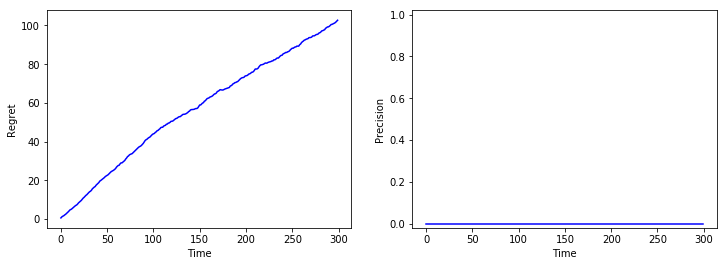

In [73]:
results = Qlearning(actionsList, u, time_horizon = 300)
regret = get_regret(*results, *get_best_action(u, actionsList))
show_metrics(regret, 300)

In [96]:
regret

(array([  0.94375851,   1.53450907,   2.31646468,   2.92942874,
          3.14521284,   3.83765959,   4.24800492,   4.34109107,
          5.28484957,   5.8295624 ,   6.2156793 ,   6.39075194,
          7.18217586,   7.46652027,   8.19609956,   8.73550456,
          8.98978912,   9.37511277,   9.86362061,  10.31823576,
         10.51869463,  11.0306643 ,  11.40935083,  11.81115615,
         12.46742302,  13.26263359,  14.2063921 ,  14.59413422,
         15.53789273,  15.93284946,  16.65702595,  17.60078446,
         18.14727458,  18.68741696,  19.09713511,  19.33699524,
         19.37204607,  19.62493859,  19.95717454,  20.3559694 ,
         21.29972791,  21.51267073,  21.8652487 ,  22.09728358,
         22.46488323,  23.40864174,  24.35240025,  24.65769116,
         25.35860347,  25.82959339,  25.98857643,  26.47861416,
         26.56856619,  26.97265036,  27.91640887,  28.6937876 ,
         28.90489815,  29.62309115,  29.61987362,  30.56363213,
         30.56089951,  30.63436535,  30.

In [74]:
get_best_action(u, actionsList)

sim :  0.32874180099820716
sim :  0.5630651601199522
sim :  0.40262483478458866
sim :  1e-07
sim :  0.28469875095029595
sim :  1e-07
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.32874180099820716
sim :  0.32874180099820716
sim :  0.5630651601199522
sim :  0.3492062684686189
sim :  0.5871202506048888
sim :  0.4276885863647354
sim :  1e-07
sim :  0.2704940124340395
sim :  1e-07
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.32874180099820716
sim :  0.32874180099820716
sim :  0.32874180099820716
sim :  0.3492062684686189
sim :  0.30242149965459286
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.30242149965459286
sim :  0.3492062684686189


(13, 0.7166933880810423)